# Imports

In [111]:
import re

from time import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

In [112]:
data = pd.read_csv('data/Balanced_Data.csv',
                  index_col = False)

In [113]:
data.head()

,text,sentiment
0,Tsunami warnings canceled after magnitude 7 9 ...,0
1,How were roads in Alaska repaired so quickly a...,1
2,Our team is out and about in Anchorage Alaska ...,1
3,My most memorable moment this year was HappyNe...,1
4,We have good news Alaskans living in the areas...,1


# Cleaning

In [114]:
data['text'] = data['text'].apply(lambda x: x.lower())

In [115]:
def clean_tweet(tweet): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [116]:
data['text'] = [clean_tweet(text) for text in data['text']]

In [117]:
data['text'] = data['text'].apply(lambda x: re.sub(r'pic twitter com [A-Za-z0-9./]+','', x))

In [118]:
data.head()

,text,sentiment
0,tsunami warnings canceled after magnitude 7 9 ...,0
1,how were roads in alaska repaired so quickly a...,1
2,our team is out and about in anchorage alaska ...,1
3,my most memorable moment this year was happyne...,1
4,we have good news alaskans living in the areas...,1


In [119]:
text_length = [len(text) for text in data.text]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f12ec646b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f12ec63b470>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f12ec646a20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f12ec63bcc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f12e578a128>],
 'means': []}

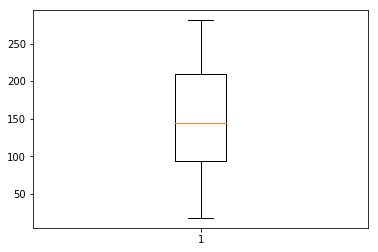

In [120]:
plt.boxplot(text_length)

# Tokenize/Features

In [121]:
max_features = 2000

In [122]:
tokenizer = Tokenizer(num_words=max_features, split=' ')

In [123]:
tokenizer.fit_on_texts(data['text'].values)

In [124]:
X = tokenizer.texts_to_sequences(data['text'].values)

In [125]:
X = pad_sequences(X)

# Model

In [126]:
embed_dim = 128
lstm_out = 196

In [127]:
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 55, 128)           256000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 55, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 591       
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


# Train-Test

In [128]:
y = pd.get_dummies(data['sentiment']).values

In [129]:
y.shape

(2204, 3)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2019)

In [131]:
print("X_train's shape is {}".format(X_train.shape))
print("y_train's shape is {}".format(y_train.shape))
print("X_test's shape is {}".format(X_test.shape))
print("y_test's shape is {}".format(y_test.shape))

X_train's shape is (1763, 55)
y_train's shape is (1763, 3)
X_test's shape is (441, 55)
y_test's shape is (441, 3)


# Train Model

In [132]:
batch_size=32

In [133]:
model.fit(X_train, y_train, epochs=5, batch_size=batch_size, verbose=1)

Epoch 1/5
1763/1763 [==============================] - 48s 27ms/step - loss: 1.0154 - acc: 0.4997
Epoch 2/5
1763/1763 [==============================] - 46s 26ms/step - loss: 0.5420 - acc: 0.7935
Epoch 3/5
1763/1763 [==============================] - 46s 26ms/step - loss: 0.2483 - acc: 0.9149
Epoch 4/5
1763/1763 [==============================] - 46s 26ms/step - loss: 0.1330 - acc: 0.9586
Epoch 5/5
1763/1763 [==============================] - 46s 26ms/step - loss: 0.0773 - acc: 0.9807


In [136]:
score,acc = model.evaluate(X_test, y_test, batch_size = batch_size)
print("Score is {}".format(score))
print("Accuracy is {}".format(acc))

441/441 [==============================] - 3s 6ms/step
Score is 0.16730491066871045
Accuracy is 0.9455782300760956


# Predictions

In [142]:
!ls 'data'

AE_test.csv  Balanced_Data.csv


In [145]:
pred = pd.read_csv('data/AE_test.csv',
                  index_col = False)

In [146]:
pred

,text,sentiment
0,OTD in 2002 M7 9 earthquake struck central Ala...,NaN
1,1 6 magnitude earthquake 71km W of Cantwell Al...,NaN
2,1 7 magnitude earthquake 80km S of Tok Alaska,NaN
3,1 7 magnitude earthquake 62km SSW of Cantwell ...,NaN
4,When an earthquake strikes the locals must pic...,NaN
5,I m presently in SE Alaska the relatively libe...,NaN
6,The earthquake capitals in the U S used to be ...,NaN
7,5 0 earthquake 71km SE of Atka Alaska 2016 10 ...,NaN
8,There was an earthquake in 150km S of False Pa...,NaN
9,Prelim M5 8 earthquake Unimak Island region Al...,NaN


In [147]:
def clean(df):
    df['text'] = data['text'].apply(lambda x: x.lower())
    df['text'] = [clean_tweet(text) for text in df['text']]
    df['text'] = df['text'].apply(lambda x: re.sub(r'pic twitter com [A-Za-z0-9./]+','', x))
    return df

In [149]:
pred = clean(pred)

In [152]:
pred_tokens = tokenizer.texts_to_sequences(pred['text'].values)

pred_tokens = pad_sequences(pred_tokens, maxlen=55, dtype='int32', value=0)

In [155]:
pred_sentiment = model.predict(pred_tokens,batch_size=1,verbose = 2)[0]

In [156]:
pred_sentiment

array([1.725141e-03, 9.979091e-01, 3.657123e-04], dtype=float32)

In [162]:
if (np.argmax(pred_sentiment) == 0):
    print("negative")
elif (np.argmax(pred_sentiment) == 1):
    print("neutral")
elif (np.argmax(pred_sentiment) == 2):
    print("positive")

neutral
